# MBA FIAP Inteligência Artificial & Machine Learning

![Image of Dementia](img/ml.png)

## Programando IA com Python
## Projeto Final: Estimando Preços de Automóveis Utilizando Modelos de Regressão

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas. Por meio uma trilha guiada para construir um classificador que permitirá predizer o valor de um automóvel baseado em algumas características que cada grupo deverá escolher.

Este projeto poderá ser feita por grupos de até 4 pessoas.

| Nome dos Integrantes        | RM            | Turma  |
| :-------------------------- | :-------------| :-----:|
| Daiana Cristina Zanelli Mota| RM 330722     | `2IA`  |
| Diogo Silva Rocha           | RM 330717     | `2IA`  |
| Carlos Alberto Figueiredo   | RM 330568     | `2IA`  |
| Renato Belandrino Rodrigues | RM 330579     | `2IA`  |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Exploração de Dados__
2. __Preparação de Dados__
3. __Desenvolvimento do Modelo__
4. __Treinamento e Teste do Modelo__
5. __Validação e Otimização do Modelo__
6. __Conclusões Finais__

## Exploração de Dados

Os dados que serão utilizados foram modificados para propocionar uma experiência que explore melhor as técnicas de processamento e preparação de dados aprendidas.

Originalmente os dados foram extraídos do Kaggle deste [dataset](https://www.kaggle.com/nisargpatel/automobiles/data).

**Implementação** 

Carregue o dataset "automobile-mod.csv" que se encontra na pasta "data" e faça uma inspeção nas 10 primeiras linhas para identificação básica dos atributos.

**O dataset original "automobile.csv" se encontra na mesma pasta apenas como referência. Não deverá ser utilizado.**

In [2]:
### Pacotes


import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.style.use('seaborn')

%matplotlib inline

In [3]:
#IMPLEMENTAÇÃO
from pandas import*
df_csv = pd.read_csv("/home/carlos/PRJ_FIAP01/PRJ_FIAP01-master/fiap-ml-prog-ia-python-capstone-master/projeto-final/data/automobile-mod.csv", sep=";")
df_csv.head(11)

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21.0,27.0,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19.0,26.0,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24.0,30.0,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500.0,19.0,25.0,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500.0,17.0,20.0,23875
9,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.8,101,5800.0,23.0,29.0,16430


Relação das coluna e seu significado:

1. make: fabricante
2. fuel_type: tipo de combustível
3. aspiration: tipo de aspiração do motor, ex. turbo ou padrão (std)
4. body_style: estilo do carro, ex. sedan ou hatchback
5. drive_wheels: tração do carro, ex. rwd (tração traseira) ou frw (tração dianteira)
6. wheel_base: entre-eixos, distância entre o eixo dianteiro e o eixo traseiro
7. length: comprimento
8. width: largura
9. height: altura
10. curb_wheight: peso
11. engine_type: tipo do motor
12. number_of_cylinders: cilindrada, quantidade de cilindros
13. engine_size: tamanho do motor
14. fuel_system: sistema de injeção
15. bore: diâmetro do cilindro
16. stroke: diâmetro do pistão
17. compression_ratio: razão de compressão
18. horsepower: cavalo de força ou HP
19. peak_rpm: pico de RPM (rotações por minuto)
20. city_mpg: consumo em mpg (milhas por galão) na cidade
21. highway_mpg: consumo em mpg (milhas por galão) na estrada
22. price: preço (**Variável Alvo**)

### Correlacionamento dos atributos

Vamos utilizar algumas suposições e validar se elas são verdadeiras, por exemplo, o preço do carro pode variar com seu consumo, tamanho ou força? Vamos explorar estas hipósteses ou outras que o grupo julgue relevante. 

Os comandos abaixo demonstram analises pelo: tipo do carro e seu tamanho, estamos analisado o preço médio do carro diante desses atributos.

In [4]:
df = df_csv[df_csv["body_style"] == "sedan"].groupby(["body_style","length"])['price'].mean()
df.sort_values()

body_style  length
sedan       158.8      6575.000000
            170.7      6785.000000
            165.3      6815.666667
            166.8      7045.000000
            167.3      7150.500000
            163.4      7295.000000
            157.3      7619.666667
            166.3      7958.000000
            172.4      8434.000000
            171.7      8560.714286
            168.7      8678.000000
            172.0      9070.600000
            173.4      9549.000000
            177.8      9845.000000
            175.6     10181.333333
            169.1     10345.000000
            175.4     10695.000000
            181.7     13499.000000
            184.6     13499.000000
            180.2     13570.000000
            177.3     15250.000000
            186.6     15433.333333
            187.8     15690.000000
            176.6     15700.000000
            186.7     15758.571429
            175.0     18312.000000
            188.8     18726.875000
            176.8     18857.500000
 

In [5]:
df = df_csv[df_csv["body_style"] == "convertible"].groupby(["body_style","length"])['price'].mean()
df.sort_values()

body_style   length
convertible  159.3     11595.0
             168.8     14997.5
             176.2     17669.0
             180.3     35056.0
             168.9     37028.0
Name: price, dtype: float64

In [6]:
df = df_csv[df_csv["body_style"] == "hatchback"].groupby(["body_style","length"])['price'].mean()
df.sort_values()

body_style  length
hatchback   156.9      5118.000000
            141.1      5151.000000
            159.1      6028.333333
            158.7      6058.000000
            155.9      6295.000000
            150.0      6352.333333
            157.3      6619.333333
            144.6      6667.000000
            157.9      7053.000000
            166.3      7781.333333
            165.6      7799.000000
            167.5      8495.000000
            168.7      8888.000000
            173.4      8949.000000
            173.0      9229.000000
            176.8      9895.000000
            165.7      9980.000000
            177.8     10228.333333
            175.6     10618.000000
            176.2     10769.000000
            172.6     11048.000000
            169.0     13020.000000
            173.2     13543.000000
            186.6     15013.333333
            183.5     16278.000000
            171.2     16500.000000
            178.4     16503.000000
            178.5     18399.000000
 

Analisando o preço médio do carro pelo: tipo de combustivel e consumo na cidade.

In [7]:
df = df_csv[df_csv["fuel_type"] == "gas"].groupby(["fuel_type","city_mpg"])['price'].mean()
df.sort_values()

fuel_type  city_mpg
gas        47.0         5151.000000
           35.0         5348.000000
           37.0         5511.000000
           49.0         6479.000000
           38.0         6501.750000
           30.0         6797.000000
           31.0         6821.592593
           32.0         7126.000000
           0.0          8195.000000
           28.0         8213.500000
           29.0         8414.666667
           27.0         9334.416667
           26.0         9352.000000
           25.0         9418.333333
           24.0        10808.727273
           23.0        11997.416667
           21.0        15830.000000
           19.0        16248.925926
           20.0        18937.666667
           18.0        19028.333333
           17.0        20738.416667
           16.0        31392.000000
           15.0        34893.333333
           13.0        36000.000000
           14.0        43180.000000
Name: price, dtype: float64

In [8]:
df = df_csv[df_csv["fuel_type"] == "diesel"].groupby(["fuel_type","city_mpg"])['price'].mean()
df.sort_values()

fuel_type  city_mpg
diesel     45.0         7099.000000
           38.0         7788.000000
           34.0         7898.000000
           37.0         8421.666667
           30.0        10698.000000
           36.0        10795.000000
           33.0        13845.000000
           25.0        15467.500000
           28.0        16016.666667
           31.0        18344.000000
           26.0        22470.000000
           0.0         28176.000000
           22.0        28466.666667
Name: price, dtype: float64

Analisando o preço médio do carro por: marca, potência e consumo de combustivel na estrada.

In [9]:
df = df_csv[df_csv["make"] == "audi"].groupby(["horsepower","highway_mpg"])['price'].mean()
df.sort_values()

horsepower  highway_mpg
102         30.0           13950.000000
110         25.0           17293.333333
115         22.0           17450.000000
140         20.0           23875.000000
Name: price, dtype: float64

In [10]:
df = df_csv[df_csv["make"] == "bmw"].groupby(["horsepower","highway_mpg"])['price'].mean()
df.sort_values()

horsepower  highway_mpg
101         29.0           16677.5
121         28.0           21037.5
            25.0           24565.0
182         22.0           36037.5
            20.0           36880.0
Name: price, dtype: float64

**Pergunta:** Cite um exemplo de pelo menos os 3 cenários propostos que corroboram a leitura dos dados apresentados, justique sua resposta.

**Resposta:** Identificamos que a principal variação de preços dos carros está atrelada a analise do preço médio por marca. Existem outros fatores que colaboram com as variações conforme as analises acima indicam. Analisando pela coluna Lenght verificamos que o preço pode ser impactado por N variaveis, utilizando a variavel Body Type visualizamos que para os carros Sedan na maioria das vezes quanto maior o carro maior o seu preço, salvo algumas exceções. Porém quando olhamos carros conversiveis o lenght nao influencia no preço. Analisando por tipo de combustivel, verificamos que os veiculos a diesel são mais caros que os veiculos a gás. Entre outras variaveis, analisamos que a Marca é um dos atributos que mais influencia na variação de preço dos carros.

## Preparação dos Dados

### Identificação de Outliers Visualmente

Utilize visualizações gráficas para encontrar outliers em todos os atributos deste dataset.
Ainda não vamos remover ou atualizar os valores, por enquanto é uma análise exploratória.

Lembre-se que cada atributo possui um valor e dimensão diferente, portanto comparações devem estar em uma mesma base, por exemplo, __price__ não pode ser comparado com __width__ pois os eixos __y__ estarão sem proporção.

In [11]:
#IMPLEMENTAÇÃO
df_csv.describe()

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,199.000000,200.000000,200.00000,201.000000
mean,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.329701,3.261741,10.164279,103.263682,5062.814070,24.925000,30.54500,13207.129353
std,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268166,0.317875,4.004965,37.389372,694.766962,6.905636,7.15359,7947.066342
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,0.000000,0.000000,0.00000,5118.000000
25%,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.00000,7775.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5100.000000,24.000000,30.00000,10295.000000
75%,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.460000,9.400000,116.000000,5500.000000,30.000000,34.00000,16500.000000
max,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.00000,45400.000000


In [12]:
df_csv.count()

make                   201
fuel_type              201
aspiration             201
number_of_doors        201
body_style             201
drive_wheels           201
engine_location        201
wheel_base             201
length                 201
width                  201
height                 201
curb_weight            201
engine_type            201
number_of_cylinders    201
engine_size            201
fuel_system            201
bore                   201
stroke                 201
compression_ratio      201
horsepower             201
peak_rpm               199
city_mpg               200
highway_mpg            200
price                  201
dtype: int64

Quando observamos a contagem acima verificamos a necessidade de tratar os dados para as variaveis rotacoes por minuto (peak_rpm = 190), consumo de combutivel na cidade (city_mpg = 200) e consumo de combustivel na estrada (highway_mpg = 200). Contamos 201 para as demais variaveis. 

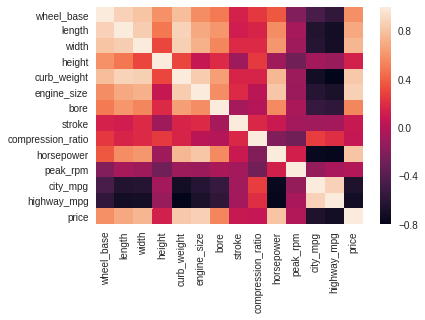

In [13]:
sns.heatmap(df_csv.corr())

Na analise do mapa de calor verificamos uma maior intensidade de tons mais escuros e mais claros relacionados a variavel price (Variável Alvo) , mostrando forte correlacao com as variaveis: consumo de combutivel na cidade (city_mpg) e consumo de combustivel na estrada (highway_mpg).

In [14]:
df_csv.corr()

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
wheel_base,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.495210,0.148239,0.250313,0.372607,-0.202727,-0.454390,-0.566392,0.584642
length,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.610324,0.116745,0.159733,0.577923,-0.056354,-0.633185,-0.709308,0.690628
width,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.545028,0.186352,0.189867,0.613488,-0.092631,-0.620316,-0.697742,0.751265
height,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.186701,-0.086508,0.259737,-0.085544,-0.275686,-0.069029,-0.117146,0.135486
curb_weight,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644871,0.162179,0.156433,0.757762,-0.098857,-0.714663,-0.800276,0.834415
engine_size,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.577265,0.184605,0.028889,0.821685,-0.104959,-0.619403,-0.671867,0.872335
bore,0.495210,0.610324,0.545028,0.186701,0.644871,0.577265,1.000000,-0.057887,0.001971,0.563921,-0.046081,-0.542294,-0.576674,0.543052
stroke,0.148239,0.116745,0.186352,-0.086508,0.162179,0.184605,-0.057887,1.000000,0.183855,0.092493,-0.065078,-0.079547,-0.071479,0.081434
compression_ratio,0.250313,0.159733,0.189867,0.259737,0.156433,0.028889,0.001971,0.183855,1.000000,-0.212984,-0.284202,0.270039,0.207436,0.071107
horsepower,0.372607,0.577923,0.613488,-0.085544,0.757762,0.821685,0.563921,0.092493,-0.212984,1.000000,0.132510,-0.763573,-0.776634,0.810795


Não foram encontrados colunas correlacionadas o suficiente para removê-las.

**Compreendendo relações e correlações de variáveis**

Antes de explorar melhor as correlações, vamos analisar se há dados discrepante no conjunto de dados. Analisar os dados sem esta análise antes pode nos levar a algum viés indesejado.

/home/carlos/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


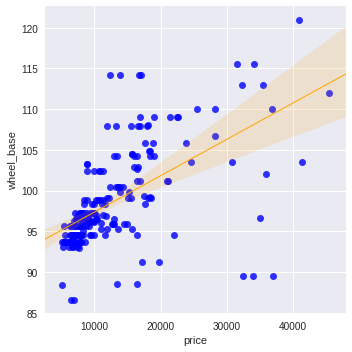

In [15]:
sns.lmplot("price", "wheel_base", df_csv,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

Explique o grafico

/home/carlos/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


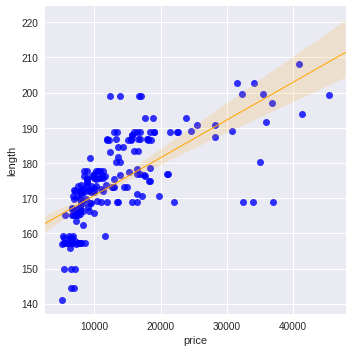

In [16]:
sns.lmplot("price", "length", df_csv,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

Explique o grafico

/home/carlos/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


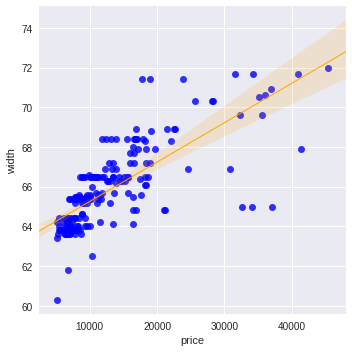

In [17]:
sns.lmplot("price", "width", df_csv,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

Explique o grafico

/home/carlos/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


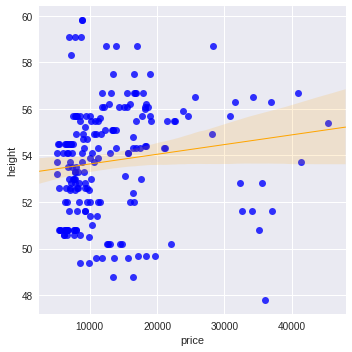

In [18]:
sns.lmplot("price", "height", df_csv,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

Explique o grafico

/home/carlos/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


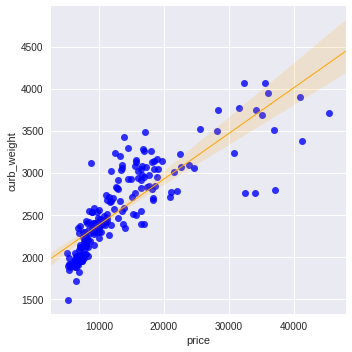

In [19]:
sns.lmplot("price", "curb_weight", df_csv,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

Explique o grafico

/home/carlos/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


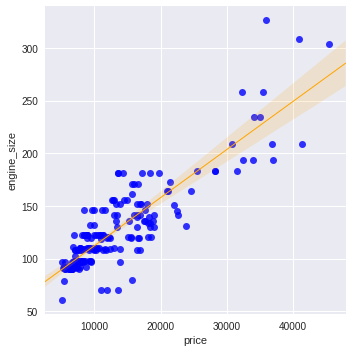

In [20]:
sns.lmplot("price", "engine_size", df_csv,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

Explique o grafico

/home/carlos/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


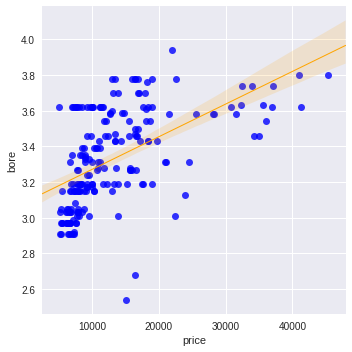

In [21]:
sns.lmplot("price", "bore", df_csv,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

Explique o grafico

/home/carlos/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


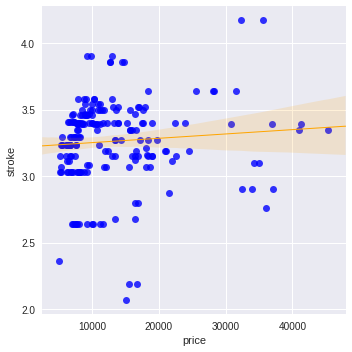

In [22]:
sns.lmplot("price", "stroke", df_csv,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

Explique o grafico

/home/carlos/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


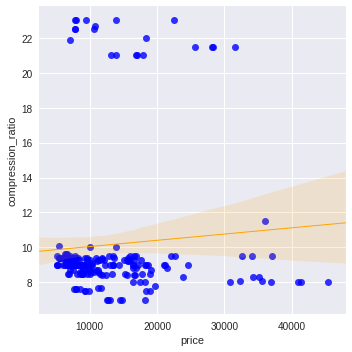

In [23]:
sns.lmplot("price", "compression_ratio", df_csv,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

Explique o grafico

/home/carlos/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


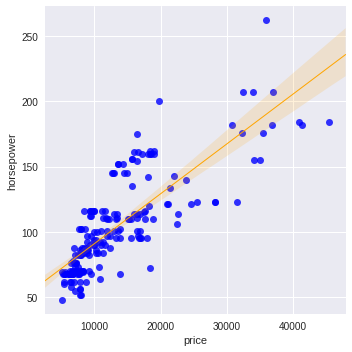

In [24]:
sns.lmplot("price", "horsepower", df_csv,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

Explique o grafico

/home/carlos/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


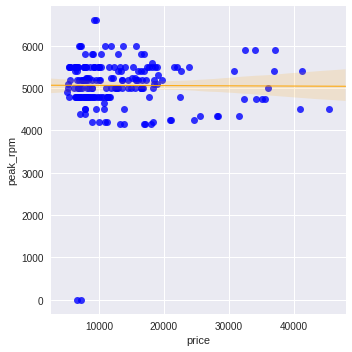

In [25]:
sns.lmplot("price", "peak_rpm", df_csv,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

Explique o grafico

/home/carlos/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


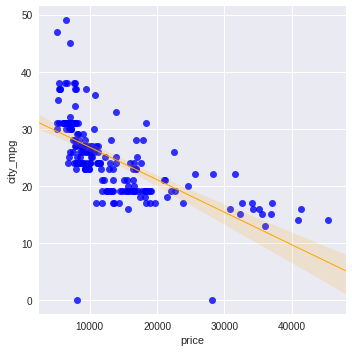

In [26]:
sns.lmplot("price", "city_mpg", df_csv,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

Explique o grafico

/home/carlos/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


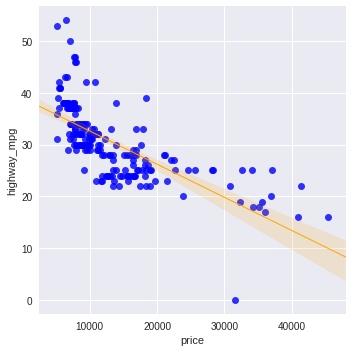

In [27]:
sns.lmplot("price", "highway_mpg", df_csv,
          scatter_kws={"marker":"x", "color":"blue"},
          line_kws={"linewidth":1, "color": "orange"})

Explique o grafico

In [28]:
df_csv['price'] = df_csv.price.astype(float)

In [29]:
df_csv.dtypes

make                    object
fuel_type               object
aspiration              object
number_of_doors         object
body_style              object
drive_wheels            object
engine_location         object
wheel_base             float64
length                 float64
width                  float64
height                 float64
curb_weight              int64
engine_type             object
number_of_cylinders     object
engine_size              int64
fuel_system             object
bore                   float64
stroke                 float64
compression_ratio      float64
horsepower               int64
peak_rpm               float64
city_mpg               float64
highway_mpg            float64
price                  float64
dtype: object

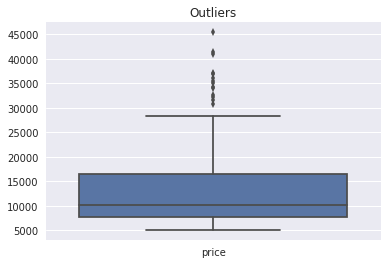

In [30]:
plt.title('Outliers')
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=df_csv[["price"]])

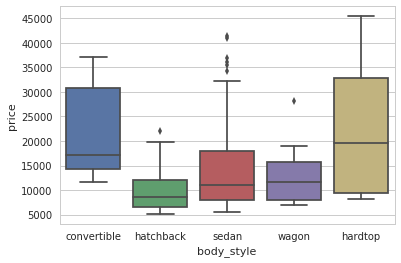

In [31]:
sns.boxplot(x= 'body_style', y= 'price',data=df_csv)

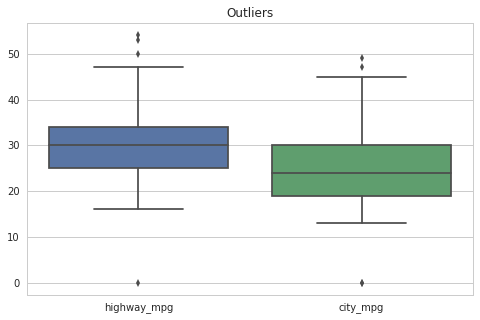

In [32]:
plt.rcParams['figure.figsize'] = (8,5)
plt.title('Outliers')
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=df_csv, order=["highway_mpg","city_mpg"])

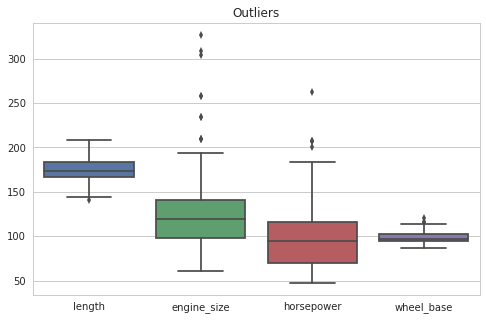

In [33]:
plt.title('Outliers')
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=df_csv, order=["length","engine_size","horsepower","wheel_base"])

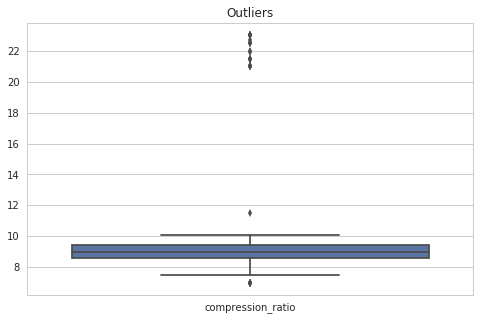

In [34]:
plt.title('Outliers')
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=df_csv, order=["compression_ratio"])

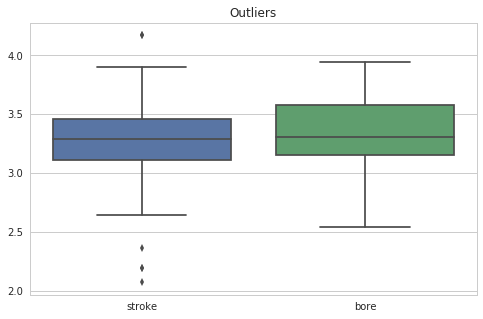

In [35]:
plt.title('Outliers')
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=df_csv, order=["stroke","bore"])

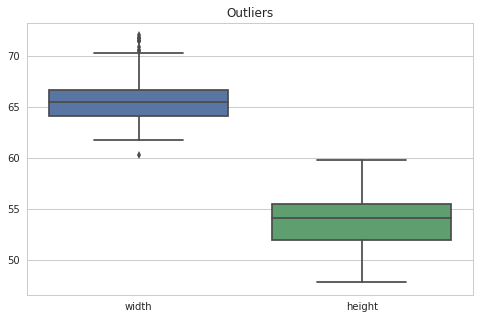

In [36]:
plt.title('Outliers')
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=df_csv, order=["width","height"])

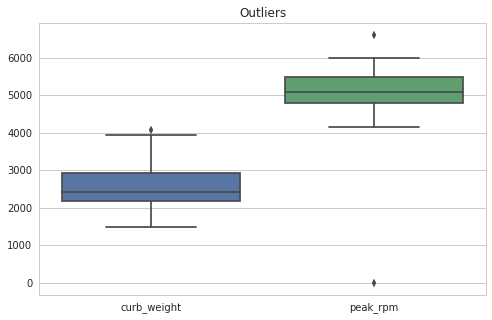

In [37]:
plt.title('Outliers' )
sns.set(style="whitegrid", color_codes=True)
sns.boxplot(data=df_csv, order=["curb_weight","peak_rpm"])

### Análise de valores inválidos

Analise e busque por valores considerados nulos.

In [38]:
#IMPLEMENTAÇÃO
df_csv.isnull().sum()[lambda x: x> 0]


peak_rpm       2
city_mpg       1
highway_mpg    1
dtype: int64

Para os dados considerados nulos, realize a imputação de dados utilizando um valor apropriado (note que pode haver dados paramétricos e dados numéricos). Justique sua resposta.
Visualizando os dados nulos:

In [39]:
#IMPLEMENTAÇÃO
df_csv[(df_csv.peak_rpm.isnull()) | (df_csv.city_mpg.isnull()) | (df_csv.highway_mpg.isnull())]


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,NaN,6529.0
36,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,...,110,1bbl,3.15,3.58,9.0,86,5800.0,NaN,33.0,7895.0
136,subaru,gas,std,two,hatchback,4wd,front,93.3,157.3,63.8,...,108,2bbl,3.62,2.64,8.7,73,NaN,26.0,31.0,7603.0
184,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.40,10.0,100,NaN,26.0,32.0,9995.0


Para os casos de peak_rpm nulo, validar quais são os valores para os demais veiculos 4wd

In [43]:
df_csv[(df_csv.peak_rpm.isnull()) | (df_csv.drive_wheels == '4wd')]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18.0,22.0,17450.0
136,subaru,gas,std,two,hatchback,4wd,front,93.3,157.3,63.8,...,108,2bbl,3.62,2.64,8.7,73,NaN,26.0,31.0,7603.0
140,subaru,gas,std,four,sedan,4wd,front,97.0,172.0,65.4,...,108,2bbl,3.62,2.64,9.0,82,4800.0,24.0,25.0,9233.0
141,subaru,gas,turbo,four,sedan,4wd,front,97.0,172.0,65.4,...,108,mpfi,3.62,2.64,7.7,111,4800.0,24.0,29.0,11259.0
144,subaru,gas,std,four,wagon,4wd,front,96.9,173.6,65.4,...,108,2bbl,3.62,2.64,9.0,82,4800.0,23.0,29.0,8013.0
145,subaru,gas,turbo,four,wagon,4wd,front,96.9,173.6,65.4,...,108,mpfi,3.62,2.64,7.7,111,4800.0,23.0,23.0,11694.0
150,toyota,gas,std,four,wagon,4wd,front,95.7,169.7,63.6,...,92,2bbl,3.05,3.03,9.0,62,4800.0,27.0,32.0,7898.0
151,toyota,gas,std,four,wagon,4wd,front,95.7,169.7,63.6,...,92,2bbl,3.05,3.03,9.0,62,4800.0,27.0,32.0,8778.0
184,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.40,10.0,100,NaN,26.0,32.0,9995.0


Após analise, o peak_rpm nulo será substituido por 4800 pelo fato da proximidade com as demais linhas

In [44]:
df_csv.loc[df_csv["peak_rpm"].isnull(), "peak_rpm"] = 4800

In [45]:
df_csv[(df_csv.city_mpg.isnull()) | (df_csv.horsepower == 76)]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
30,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,...,92,1bbl,2.91,3.41,9.2,76,6000.0,31.0,38.0,6855.0
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,NaN,6529.0
33,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,6000.0,30.0,34.0,7129.0
34,honda,gas,std,four,sedan,fwd,front,96.5,163.4,64.0,...,92,1bbl,2.91,3.41,9.2,76,6000.0,30.0,34.0,7295.0
35,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,...,92,1bbl,2.92,3.41,9.2,76,0.0,30.0,34.0,7295.0
36,honda,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,...,110,1bbl,3.15,3.58,9.0,86,5800.0,NaN,33.0,7895.0


O city_mpg será substituido por 30 pela proximidade com as demais linhas

In [46]:
df_csv.loc[df_csv["city_mpg"].isnull(), "city_mpg"] = 30

O highway_mpg será substituido por 34 pela proximidade com as demais linhas

In [47]:
df_csv.loc[df_csv["highway_mpg"].isnull(), "highway_mpg"] = 34

### Análise de valores com valores iguais a 0

In [49]:
df_csv.loc[(df_csv==0).any(1)]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,34.0,6529.0
35,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,...,92,1bbl,2.92,3.41,9.2,76,0.0,30.0,34.0,7295.0
66,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,...,183,idi,3.58,3.64,21.5,123,4350.0,0.0,25.0,28176.0
67,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,...,183,idi,3.58,3.64,21.5,123,4350.0,22.0,0.0,31600.0
181,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.40,9.0,85,5250.0,0.0,34.0,8195.0


Analise se no conjunto de dados há valores iguais a 0 e verifique se faz parte do contexto. Caso não faça parte do contexto, utilize alguma técnica de imputação de dados apropriada.

Inspecione o dataset por dados iguais a 0.

In [50]:
#IMPLEMENTAÇÃO
df_csv[(df_csv.peak_rpm == 0) | (df_csv.horsepower == 76)]


,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
30,honda,gas,std,two,hatchback,fwd,front,86.6,144.6,63.9,...,92,1bbl,2.91,3.41,9.2,76,6000.0,31.0,38.0,6855.0
32,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,0.0,30.0,34.0,6529.0
33,honda,gas,std,two,hatchback,fwd,front,93.7,150.0,64.0,...,92,1bbl,2.91,3.41,9.2,76,6000.0,30.0,34.0,7129.0
34,honda,gas,std,four,sedan,fwd,front,96.5,163.4,64.0,...,92,1bbl,2.91,3.41,9.2,76,6000.0,30.0,34.0,7295.0
35,honda,gas,std,four,wagon,fwd,front,96.5,157.1,63.9,...,92,1bbl,2.92,3.41,9.2,76,0.0,30.0,34.0,7295.0


In [51]:
df_csv[(df_csv.city_mpg == 0) | (df_csv.peak_rpm == 4350.0) | (df_csv.peak_rpm == 5250.0)]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
64,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,...,183,idi,3.58,3.64,21.50,123,4350.0,22.0,25.0,25552.0
65,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,...,183,idi,3.58,3.64,21.50,123,4350.0,22.0,25.0,28248.0
66,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,...,183,idi,3.58,3.64,21.50,123,4350.0,0.0,25.0,28176.0
67,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,...,183,idi,3.58,3.64,21.50,123,4350.0,22.0,0.0,31600.0
128,saab,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,...,121,mpfi,3.54,3.07,9.31,110,5250.0,21.0,28.0,11850.0
129,saab,gas,std,four,sedan,fwd,front,99.1,186.6,66.5,...,121,mpfi,3.54,3.07,9.30,110,5250.0,21.0,28.0,12170.0
130,saab,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,...,121,mpfi,2.54,2.07,9.30,110,5250.0,21.0,28.0,15040.0
131,saab,gas,std,four,sedan,fwd,front,99.1,186.6,66.5,...,121,mpfi,3.54,3.07,9.30,110,5250.0,21.0,28.0,15510.0
179,volkswagen,gas,std,two,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.40,9.00,85,5250.0,27.0,34.0,7975.0
181,volkswagen,gas,std,four,sedan,fwd,front,97.3,171.7,65.5,...,109,mpfi,3.19,3.40,9.00,85,5250.0,0.0,34.0,8195.0


A imputação de dados pode seguir algum padrão dos demais exemplos ou pode ser simplesmente atribuído um valor. Avalie tais condições de acordo com as inspeções de dados.
Todos os casos de horsepower igual a 76 tem o peak_rpm igual a 6000, sendo assim, para os casos zerados utilizaremos 6000

In [52]:
#IMPLEMENTAÇÃO
df_csv.loc[df_csv["peak_rpm"] == 0, "peak_rpm"] = 6000


Os casos de 25 highway_mpg tem como padrão 22 city_mpg

In [53]:
df_csv.loc[(df_csv["city_mpg"] == 0) & (df_csv["peak_rpm"] == 4350.0), "city_mpg"] = 22
df_csv.loc[(df_csv["highway_mpg"] == 0) & (df_csv["peak_rpm"] == 4350.0), "highway_mpg"] = 25

O peak_rpm 5250 tem city_mpg padrao de 27

In [54]:
df_csv.loc[(df_csv["city_mpg"] == 0) & (df_csv["peak_rpm"] == 5250.0), "city_mpg"] = 27

### Análise Numérica de Outliers

Da análise visual de outliers realizada acima vamos utilizar uma métrica de verificação mais apropriada e objetiva afim de criar um patamar aceitável de dados não discrepantes.

Neste projeto vamos considerar [o Método Turco para identificar discrepantes](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/), que utiliza um __passo de limite__ que é 5 vezes (em nosso projeto) a diferença entre o terceiro (Q3) e o primeiro quartil (Q1). Deste modo, valores que sejam maiores que o Q3 + passo de limite ou menor Q2 - passo de limite sejam sinalizados como outliers.

Construa uma função que receba como parâmetro de entrada um série de dados e exiba os valores discrepantes. Utilize o boilerplate abaixo para completar as instruções faltantes.

*Dica: utilize a função do Numpy de percentil, np.percentile(serie, 25) para quartil 1 e np.percentile(serie, 75) para quartil 3.*

In [55]:
def identificacao_outlier(df, column_name): 
    print("---------------------------------")
    print("Coluna: "+column_name)
    print("Q1: "+str(np.percentile(df[column_name], 25)))
    print("Q3: "+str(np.percentile(df[column_name], 75)))
    print("Min: "+str(np.min(df[column_name])))
    print("Max: "+str(np.max(df[column_name])))
    passo = (np.percentile(df[column_name], 75) - np.percentile(df[column_name], 25))*5
    print("Passo: "+str(passo))
    outlier_lower = df[(df[column_name] < np.percentile(df[column_name], 25)-passo)]
    outlier_upper = df[(df[column_name] > np.percentile(df[column_name], 75)+passo)]
    #IMPLEMENTAÇÃO
    if len(outlier_lower) > 0:
        print("Outliers Lower")
        print(outlier_lower)
    if len(outlier_upper) > 0:
        print("Outliers Upper")
        print(outlier_upper)
    if len(outlier_upper) == 0 & len(outlier_upper) == 0:
        print("--------- Sem outliers-----------")

In [56]:
identificacao_outlier(df_csv, "wheel_base")
identificacao_outlier(df_csv, "length")
identificacao_outlier(df_csv, "width")
identificacao_outlier(df_csv, "height")
identificacao_outlier(df_csv, "curb_weight")
identificacao_outlier(df_csv, "engine_size")
identificacao_outlier(df_csv, "bore")
identificacao_outlier(df_csv, "stroke")
identificacao_outlier(df_csv, "compression_ratio")
identificacao_outlier(df_csv, "horsepower")
identificacao_outlier(df_csv, "peak_rpm")
identificacao_outlier(df_csv, "city_mpg")
identificacao_outlier(df_csv, "highway_mpg")
identificacao_outlier(df_csv, "price")

---------------------------------
Coluna: wheel_base
Q1: 94.5
Q3: 102.4
Min: 86.6
Max: 120.9
Passo: 39.50000000000003
--------- Sem outliers-----------
---------------------------------
Coluna: length
Q1: 166.8
Q3: 183.5
Min: 141.1
Max: 208.1
Passo: 83.49999999999994
--------- Sem outliers-----------
---------------------------------
Coluna: width
Q1: 64.1
Q3: 66.6
Min: 60.3
Max: 72.0
Passo: 12.5
--------- Sem outliers-----------
---------------------------------
Coluna: height
Q1: 52.0
Q3: 55.5
Min: 47.8
Max: 59.8
Passo: 17.5
--------- Sem outliers-----------
---------------------------------
Coluna: curb_weight
Q1: 2169.0
Q3: 2926.0
Min: 1488
Max: 4066
Passo: 3785.0
--------- Sem outliers-----------
---------------------------------
Coluna: engine_size
Q1: 98.0
Q3: 141.0
Min: 61
Max: 326
Passo: 215.0
--------- Sem outliers-----------
---------------------------------
Coluna: bore
Q1: 3.15
Q3: 3.58
Min: 2.54
Max: 3.94
Passo: 2.150000000000001
--------- Sem outliers-----------
--------

Continuando a analise

In [57]:
df_csv[(df_csv.fuel_type == "diesel")]

,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
60,mazda,diesel,std,four,sedan,fwd,front,98.8,177.8,66.5,...,122,idi,3.39,3.39,22.7,64,4650.0,36.0,42.0,10795.0
63,mazda,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,...,134,idi,3.43,3.64,22.0,72,4200.0,31.0,39.0,18344.0
64,mercedes-benz,diesel,turbo,four,sedan,rwd,front,110.0,190.9,70.3,...,183,idi,3.58,3.64,21.5,123,4350.0,22.0,25.0,25552.0
65,mercedes-benz,diesel,turbo,four,wagon,rwd,front,110.0,190.9,70.3,...,183,idi,3.58,3.64,21.5,123,4350.0,22.0,25.0,28248.0
66,mercedes-benz,diesel,turbo,two,hardtop,rwd,front,106.7,187.5,70.3,...,183,idi,3.58,3.64,21.5,123,4350.0,22.0,25.0,28176.0
67,mercedes-benz,diesel,turbo,four,sedan,rwd,front,115.6,202.6,71.7,...,183,idi,3.58,3.64,21.5,123,4350.0,22.0,25.0,31600.0
87,nissan,diesel,std,two,sedan,fwd,front,94.5,165.3,63.8,...,103,idi,2.99,3.47,21.9,55,4800.0,45.0,50.0,7099.0
105,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,...,152,idi,3.70,3.52,21.0,95,4150.0,28.0,33.0,13200.0
107,peugot,diesel,turbo,four,wagon,rwd,front,114.2,198.9,68.4,...,152,idi,3.70,3.52,21.0,95,4150.0,25.0,25.0,13860.0
109,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,...,152,idi,3.70,3.52,21.0,95,4150.0,28.0,33.0,16900.0


**Pergunta:** Houve dados discrepantes localizados pela metodologia sugerida? Quais foram os atributos discretpantes e quais as hipótese de serem discrepantes? Qual foi a sua conclusão, são realmente dados que devem ser removidos ou mantidos? Justifique.

**Resposta:** Sim, houveram dados discrepantes para a taxa de compressão. Esses dados devem ser mantidos porque são veículos movidos à diesel e é uma característica de motores a diesel ter uma taxa de compressão maior que os demais combustíveis.

### Mapeamento de Dados Paramétricos

Os algoritmos de aprendizado de máquina precisam receber dados que sejam inteiramente numéricos. Dados que representam uma classificação como por exemplo um tipo de carro, como sedan ou hatchback, deve ser convertido em um valor numérico associado, como por exemplo 1 ou 2.

Crie uma função que receba uma lista única e retorne um dicionário com a categoria e um código numérico crescente e incremental para posteriormente utilizarmos como mapeamento.

In [58]:
#IMPLEMENTAÇÃO
def mapeamento(s):
    return dict([[v,k] for k,v in dict(enumerate(s.unique())).items()])

Com a funcão criada, crie dicionários para cada coluna paramétrica. Lembre-se que é necessário passar somente valores únicos.

*Dica: utilize a função unique() do dataframe para obter valores únicos de uma determinada série (ou coluna).*

In [59]:
# IMPLEMENTAÇÃO 
dictMake = mapeamento(df_csv.make)
dictFuel = mapeamento(df_csv.fuel_type)
dictAspiration = mapeamento(df_csv.aspiration)
dictDoors = mapeamento(df_csv.number_of_doors)
dictBodystyle = mapeamento(df_csv.body_style)
dictDriveWheels = mapeamento(df_csv.drive_wheels)
dictEngineLocation = mapeamento(df_csv.engine_location)
dictFuelSystem = mapeamento(df_csv.fuel_system)
dictEngineType = mapeamento(df_csv.engine_type)
dictNumCilinders = mapeamento(df_csv.number_of_cylinders)

Até este momento seu conjunto de dados não deve conter nenhum dado paramétrico. Todos os dados armazenados com valores como texto, por exemplo, "diese", "gas" deve estar preenchido com valores numéricos, como 1 ou 2.

Inspecione seus dados e certifique de que tudo está certo.

*Dica: utilize uma inspeção simples visual, com 20 amostras.*

In [60]:
#IMPLEMENTAÇÃO
df_dict = df_csv.assign(num_make = list(map(lambda x: dictMake.get(x), df_csv.make)))
df_dict = df_dict.drop('make',1)

df_dict = df_dict.assign(num_fuel_type = list(map(lambda x: dictFuel.get(x), df_csv.fuel_type)))
df_dict = df_dict.drop('fuel_type',1)

df_dict = df_dict.assign(num_aspiration = list(map(lambda x: dictAspiration.get(x), df_csv.aspiration)))
df_dict = df_dict.drop('aspiration',1)

df_dict = df_dict.assign(num_number_of_doors = list(map(lambda x: dictDoors.get(x), df_csv.number_of_doors)))
df_dict = df_dict.drop('number_of_doors',1)

df_dict = df_dict.assign(num_body_style = list(map(lambda x: dictBodystyle.get(x), df_csv.body_style)))
df_dict = df_dict.drop('body_style',1)

df_dict = df_dict.assign(num_drive_wheels = list(map(lambda x: dictDriveWheels.get(x), df_csv.drive_wheels)))
df_dict = df_dict.drop('drive_wheels',1)

df_dict = df_dict.assign(num_engine_location = list(map(lambda x: dictEngineLocation.get(x), df_csv.engine_location)))
df_dict = df_dict.drop('engine_location',1)

df_dict = df_dict.assign(num_fuel_system = list(map(lambda x: dictFuelSystem.get(x), df_csv.fuel_system)))
df_dict = df_dict.drop('fuel_system',1)

df_dict = df_dict.assign(num_engine_type = list(map(lambda x: dictEngineType.get(x), df_csv.engine_type)))
df_dict = df_dict.drop('engine_type',1)

df_dict = df_dict.assign(num_number_of_cylinders = list(map(lambda x: dictNumCilinders.get(x), df_csv.number_of_cylinders)))
df_dict = df_dict.drop('number_of_cylinders',1)

df_dict.head(20)

,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,...,num_make,num_fuel_type,num_aspiration,num_number_of_doors,num_body_style,num_drive_wheels,num_engine_location,num_fuel_system,num_engine_type,num_number_of_cylinders
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,1,0,0,0,1,1
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,1,0,0,1,2,1,0,0,2,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,1,0,0,1,2,2,0,0,2,2
5,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,8.5,110,...,1,0,0,0,2,1,0,0,2,2
6,105.8,192.7,71.4,55.7,2844,136,3.19,3.40,8.5,110,...,1,0,0,1,2,1,0,0,2,2
7,105.8,192.7,71.4,55.7,2954,136,3.19,3.40,8.5,110,...,1,0,0,1,3,1,0,0,2,2
8,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,8.3,140,...,1,0,1,1,2,1,0,0,2,2
9,101.2,176.8,64.8,54.3,2395,108,3.50,2.80,8.8,101,...,2,0,0,0,2,0,0,0,2,0


## Desenvolvimento do Modelo

O conjunto de dados que temos a nossa disposição indica a aplicação de um modelo voltado a regressão, ou seja, queremos prever um preço de um veículo dada certas condições. É um problema típico de predição de série numérica.

Podemos aplicar quaisquer algoritmos de regressão existente que tenha aplicação de classificação, pois é de um domínio diferente.

Iremos explorar 3 modelos de algoritmos de regressão para testar a performance de cada um deles. Ao final será eleito o que apresentar melhor performance de pontuação R2.

Os algoritmos são:

1. [Regressão Linear](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)
2. [Regressão de Árvore de Decisão](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)
3. [Regressão Ridge](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression)

**Pergunta:** Explique como cada modelo de regressão funciona, indicando pelo menos um caso de uso em cada um deles.

**Resposta:**

Antes de partimos para o treinamento do modelo, precisaremos separar os dados em subconjuntos para permitir avaliar adequadamente o modelo.

Uma boa razão de tamanho de conjunto de treinamento e testes é 80% e 20% ou ainda, 70% e 30%. O importante é não misturar dados de treinamento com os de teste para termos uma ideia melhor sobre a performance do modelo com dados previametne não treinados.

Antes de separarmos os dados, a partir das análises realizadas anteriormente, quais seriam os atributos a serem utilizados e por qual motivo. Informe também qual seria o atributo preditor?

In [61]:
#IMPLEMENTAÇÃO
col_names          = ['horsepower', 
                     'num_make', 
                     'num_fuel_type',
                     'num_aspiration',
                     'num_body_style',
                     'num_drive_wheels',
                     'num_number_of_cylinders']
pred_names         = ['price']

Crie subsets de treinamento e teste utilizado uma razão adequada de tamanho.
Utilze o ```train_test_split``` passando como parâmetros

In [62]:
from sklearn.model_selection import train_test_split

#IMPLEMENTAÇÃO
X = df_dict[col_names].values
y = df_dict[pred_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)


Inspecione cada subconjunto de dados obtidos do ```train_test_split```. Note que nos conjuntos X devemos ter atributos, logo é esperado uma matriz com mais de uma coluna. Nos conjuntos y, é a classe de predição, logo é esperado apenas um atributo.

In [63]:
#IMPLEMENTAÇÃO
#Inspeção de X_train
X_train


array([[ 97,  12,   0,   0,   2,   1,   0],
       [ 60,   5,   0,   0,   1,   1,   0],
       [121,   2,   0,   0,   2,   0,   1],
       [ 76,   5,   0,   0,   3,   1,   0],
       [ 68,  14,   0,   0,   2,   1,   0],
       [ 78,   6,   0,   0,   2,   0,   0],
       [114,  21,   0,   0,   2,   0,   0],
       [ 69,  12,   0,   0,   3,   1,   0],
       [ 73,  18,   0,   0,   1,   2,   0],
       [ 68,   8,   0,   0,   2,   1,   0],
       [ 90,  16,   0,   0,   1,   1,   0],
       [112,  19,   0,   0,   1,   0,   0],
       [100,   5,   0,   0,   2,   1,   0],
       [ 68,  14,   0,   0,   2,   1,   0],
       [ 95,  13,   1,   1,   2,   0,   0],
       [102,   4,   0,   1,   2,   1,   0],
       [ 94,  18,   0,   0,   2,   1,   0],
       [152,  12,   0,   0,   2,   1,   1],
       [ 95,  13,   1,   1,   3,   0,   0],
       [154,   0,   0,   0,   1,   0,   1],
       [116,  11,   0,   1,   1,   1,   0],
       [262,   7,   0,   0,   2,   0,   4],
       [162,  21,   0,   1,   2,

In [64]:
#IMPLEMENTAÇÃO
#Inspeção de Y_train
y_train


array([[ 9549.],
       [ 5399.],
       [21105.],
       [ 7295.],
       [ 7609.],
       [ 6785.],
       [12940.],
       [ 7349.],
       [ 7603.],
       [ 7395.],
       [ 9895.],
       [ 9538.],
       [10345.],
       [ 6692.],
       [17950.],
       [ 8558.],
       [ 9960.],
       [13499.],
       [17075.],
       [16500.],
       [ 9959.],
       [36000.],
       [18420.],
       [15985.],
       [ 9279.],
       [ 9298.],
       [ 7895.],
       [13415.],
       [11245.],
       [ 7957.],
       [11259.],
       [17199.],
       [ 7129.],
       [20970.],
       [18950.],
       [ 8058.],
       [17710.],
       [ 8921.],
       [ 8921.],
       [17450.],
       [ 6529.],
       [ 7463.],
       [11694.],
       [16900.],
       [ 8013.],
       [16925.],
       [18280.],
       [16630.],
       [ 5348.],
       [11199.],
       [13495.],
       [ 7995.],
       [ 7198.],
       [40960.],
       [32528.],
       [25552.],
       [32250.],
       [ 8449.],
       [12964.

Verifique também se a razão dos conjuntos está coerente com a divisão estabelecida. Para estes cálculos divia o número de itens do conjunto de treino pelo total e também o de testes pelo total.

In [65]:
#IMPLEMENTAÇÃO
print("{0:0.2f}% dados de treinamento".format((len(X_train)/len(df_dict.index)) * 100))
print("{0:0.2f}% dados de teste".format((len(X_test)/len(df_dict.index)) * 100))


69.65% dados de treinamento
30.35% dados de teste


## Treinamento e teste do modelo

Após separarmos os dados adequadamente, selecionar os atributos que irão compor como o modelo deve treinar e qual atributo deve perseguir, o próximo passo é treinar este modelo e verificar, pelos testes, sua performance.

Este estudo também irá levar a escolhermos qual algoritmo devemos utilizar dentre os três selecionados neste ajuste.

Para avaliarmos a performance dos modelos, vamos criar uma função que determinará a pontuação R2.

Não esqueça de avaliar os conjuntos de dados de treino (```X_train```, ```y_train``` e de teste, ```X_test``` e ```y_test```)

In [67]:
#IMPLEMENTAÇÃO
from sklearn.metrics import mean_squared_error, r2_score

def pontuacao(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print("%s R2 score: %.2f" %(modelo,r2_score(y_test, y_pred)))

### Regressão Linear

Utilize para a variável preditora a função ```.ravel()``` para converter os dados no formato que o ```sklearn``` espera.

In [68]:
#IMPLEMENTAÇÃO
from sklearn import linear_model

lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train.ravel())


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [69]:
#IMPLEMENTAÇÃO
pontuacao(lr_model, X_test, y_test)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False) R2 score: 0.80


### Regressão de árvore de Decisão

In [76]:
from sklearn import tree

#IMPLEMENTAÇÃO
dtr_model = tree.DecisionTreeRegressor()
dtr_model.fit(X_train, y_train.ravel())

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [77]:
#IMPLEMENTAÇÃO
pontuacao(dtr_model, X_test, y_test)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best') R2 score: 0.77


### Regressão Ridge

In [80]:
#IMPLEMENTAÇÃO
from sklearn.linear_model import Ridge

lrr_model = linear_model.Ridge()
lrr_model.fit(X_train, y_train.ravel())

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

Obténha a pontuação R2, utilizando a função ```pontuacao``` para os conjuntos de treino e de teste.

In [81]:
#IMPLEMENTAÇÃO
pontuacao(lrr_model, X_test, y_test)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001) R2 score: 0.79


**Pergunta:** Nesta análise preliminar, como foi a performance de cada algoritmo? Explique os resultados e detalhe como a característica de cada algoritmo influenciou no resultado.

**Resposta:**

## Validação e Otimização do Modelo

Cada algoritmo de modelo pode oferecer a possibilidade de ajustes de seus parâmetros. Tais ajustes podem contribuir para melhorar ou piorar o modelo, portanto esta fase de otimização e validação é importante entender o patamar de partida, com os valores padrões obtidos nos passos anteriores versus as otimizações.

É comum que as otimizações não sejam capazes de alterar os patamares padrão.

O Scikit Learn oferece uma forma simplificada de testar diversas condições de parâmetros diferentes por meio do ```GridSearchCV```. Após diversos testes é apresentado os parâmetros que obtiveram os melhores resultados.

### Regulação dos parâmetros dos modelos

Analise os parâmetros possíveis de cada algortimo de regressão e crie um dicionário para ser utilizado no ```GridSearchCV```.
O dicionário é composto pelo nome do parâmetro como chave. Seu valor será uma lista de valores que se deseja otimizar. Não deixe de revisar a [documentação]( )

Verfique a pontuação R2 para os conjuntos de dados de treino e de teste, pois nem sempre preditores que se saem bem durante o treinamento terão a mesma performance com os dados de teste.

### Regulação do Modelo de Regressão Linear

Escolha quais atributos incluir na variável ```parameters```para serem otimizados. Essa variável é um dicionário onde cada chave representa uma configuração do modelo, o valor pode ser único ou uma lista, neste caso utilize ```[]``` para incluir múltiplos valores. Como nosso problema é relacionado a regressão, utilize a pontuação R2 em ```scoring``` na configuração do ```GridSearchCV```. 

In [103]:
from sklearn.model_selection import GridSearchCV
        
parameters = {}
opt_model_lr = GridSearchCV(lr_model, parameters, scoring='r2')
opt_model_lr.fit(X_train, y_train.ravel())

/home/carlos/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/carlos/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Calcule as pontuações para o melhor estimador com dados de treino.

In [104]:
opt_model_lr.score(X_train, y_train.ravel()), opt_model_lr.best_estimator_

(0.787040051743801,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False))

E também para os dados de testes.

In [105]:
opt_model_lr.score(X_test, y_test.ravel()), opt_model_lr.best_estimator_

(0.797648693813974,
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
          normalize=False))

### Regulação do Modelo de Regressão de Árvore de Decisão

In [108]:
parameters = {"criterion":['mse','friedman_mse','mae'], "max_depth":[None], 
             "max_features":['auto','sqrt','log2'],
           "max_leaf_nodes":[None], "min_impurity_decrease":[0.0],
           "min_impurity_split":[None], "min_samples_leaf":[1],
           "min_samples_split":[2], "min_weight_fraction_leaf":[0.0],
           "presort":[False], "random_state":[5,None], "splitter":['best','random']}
opt_model_dtr = GridSearchCV(dtr_model, parameters, scoring='r2')
opt_model_dtr.fit(X_train, y_train.ravel())

/home/carlos/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/carlos/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['mse', 'friedman_mse', 'mae'], 'max_depth': [None], 'max_features': ['auto', 'sqrt', 'log2'], 'max_leaf_nodes': [None], 'min_impurity_decrease': [0.0], 'min_impurity_split': [None], 'min_samples_leaf': [1], 'min_samples_split': [2], 'min_weight_fraction_leaf': [0.0], 'presort': [False], 'random_state': [5, None], 'splitter': ['best', 'random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Pontuação dos dados de treino.

In [122]:
#IMPLEMENTAÇÃO
opt_model_dtr.score(X_train, y_train.ravel()), opt_model_dtr.best_estimator_


(0.9897695609732118,
 DecisionTreeRegressor(criterion='mae', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))

Pontuação dos dados de teste.

In [124]:
# IMPLEMENTAÇÃO
opt_model_dtr.score(X_test, y_test.ravel()), opt_model_dtr.best_estimator_

(0.7456749380953185,
 DecisionTreeRegressor(criterion='mae', max_depth=None, max_features='sqrt',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'))

### Regulação do Modelo de Regressão Ridge

In [114]:
parameters = {"alpha": [1.0,2.0,3.0], "fit_intercept": [False,True],
             "copy_X": [False,True], "max_iter": [None],
             "normalize": [False,True], "random_state": [1,5,18,45,None], "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"], 
              "tol": [1]}

opt_model_lrr = GridSearchCV(lrr_model, parameters, scoring='r2')
opt_model_lrr.fit(X_train, y_train.ravel())

/home/carlos/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/carlos/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1.0, 2.0, 3.0], 'fit_intercept': [False, True], 'copy_X': [False, True], 'max_iter': [None], 'normalize': [False, True], 'random_state': [1, 5, 18, 45, None], 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'], 'tol': [1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

Pontuação dos dados de treino.

In [115]:
#IMPLEMENTAÇÃO
opt_model_lrr.score(X_train, y_train.ravel()), opt_model_lrr.best_estimator_


(0.7845925303539834,
 Ridge(alpha=1.0, copy_X=False, fit_intercept=False, max_iter=None,
    normalize=False, random_state=1, solver='svd', tol=1))

Pontuação dos dados de teste.

In [116]:
#IMPLEMENTAÇÃO
opt_model_lrr.score(X_test, y_test.ravel()), opt_model_lrr.best_estimator_


(0.787289294226693,
 Ridge(alpha=1.0, copy_X=False, fit_intercept=False, max_iter=None,
    normalize=False, random_state=1, solver='svd', tol=1))

Sumarize na tabela abaixo os indicadores para cada um dos preditores e suas respectivas pontuações para os conjuntos de dados de treino e de testes

|                     | Regressão linear | Regressão árvore de decisão | Regressão ridge |
|:---------------------|:------------------:|:-----------------------------:|:-----------------:|
| R2 treino |0.787040051743801|0.9897695609732118|0.7845925303539834|
| R2 teste  |0.797648693813974|0.7456749380953185|0.787289294226693|


**Pergunta:** Qual dos algoritmos de regressão obteve os melhores resultados? Quais caracaterísticas deste algoritmo podem ajudar a justificar tal resultado?

**Resposta:**  O algoritimo de arvore de decisão. O fato de cada caracteristica ser avaliada individualmente e seguir determinado fluxo conforme a avaliação de cada uma delas. Como as variáveis preditoras já foram escolhidas de forma pensada, diversas regulações do modelo Ridge resultaram no mesmo escore do modelo.

### Implementação do algoritmo otimizado

Configure o classificador selecionado com os parâmetros otimizados obtidos anteriormente.

In [125]:
#IMPLEMENTAÇÃO
dtr_model_opt = tree.DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='log2',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
dtr_model_opt.fit(X_train, y_train.ravel()) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='log2',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

### Teste com exemplos

Utilize 3 exemplos criados por você mesmo para obter um valor de venda de veículo. Escolha caracaterísticas que demonstrem como o regressor deveria se comportar. Para tanto, imagine exemplos dos quais você espera um valor baixo, mediano e alto do preço do veículo baseado nos atributos escolhidos

In [129]:
#Lembre-se que os atributos são os armazenados na lista feature_col_names

col_names

['horsepower',
 'num_make',
 'num_fuel_type',
 'num_aspiration',
 'num_body_style',
 'num_drive_wheels',
 'num_number_of_cylinders']

In [130]:
#IMPLEMENTAÇÃO
#A entrada de dados deve ser uma matriz do seguinte formato, note que há dois colchetes pois é uma 
#matriz dentro de outra matriz [[a,b,c,d,e]]

#chevolet
exemplo_vec_barato = df_dict[df_dict.num_make == 3].sample(1)

#toyota
exemplo_vec_medio = df_dict[df_dict.num_make == 19].sample(1)

#audi
exemplo_vec_caro = df_dict[df_dict.num_make == 1].sample(1)

dtr_model_opt.predict(exemplo_vec_caro[col_names].values)

print("Carro Barato - Valor Real {0} - Valor Predito {1}".format(exemplo_vec_barato["price"].iloc[0], dtr_model_opt.predict(exemplo_vec_barato[col_names].values)))
print("Carro Médio - Valor Real {0} - Valor Predito {1}".format(exemplo_vec_medio["price"].iloc[0], dtr_model_opt.predict(exemplo_vec_medio[col_names].values)))
print("Carro Caro - Valor Real {0} - Valor Predito {1}".format(exemplo_vec_caro["price"].iloc[0], dtr_model_opt.predict(exemplo_vec_caro[col_names].values)))

#test_example_1 = [[]]
#test_example_2 = [[]]
#test_example_3 = [[]]

Carro Barato - Valor Real 6575.0 - Valor Predito [7609.]
Carro Médio - Valor Real 6938.0 - Valor Predito [7738.]
Carro Caro - Valor Real 17710.0 - Valor Predito [17710.]


Caso eu classificador esteja com comportamento muito enviesado (_overfitting_) reveja a escolha dos atributos selecionados e repita a otimização até que os valores de predição deste exemplo estejam coerentes.

## Conclusões finais

Este projeto apresentou de forma simplifcada o __Worflow de Machine Learning__ que pode servir como base para estudos relacionados a classificação ou predição de séries numéricas.

A fase de preparação, evidenciada no projeto, é uma das mais importantes da qual se precisa investir um bom tempo para dar os dados organizados e confiáveis, pois é a forma como os classificadores irão aprender com os exemplos e tentarão desvencilhar de efeitos indesejáveis como os vieses.

Regressores são um tipo de algoritmo de machine learning que pode ser aplicado em diversas áreas das quais é necessário predizer um número baseado em um conjunto de dados numéricos ou série numérica, logo sua aplicação é bem ampla.

**Pergunta:** Seu modelo conseguiu prever adequadamente novos dados a partir do treinamento dos dados de teste? O que você faria diferente?

**Resposta:** O modelo obteve um bom resultado nas previsões, para um modelo de produção poderiamos avaliar se existem algumas variáveis externas, algo referente ao mercado de veículos que podem influênciar no preço, e inclui-las na base para ajudar o modelo a encontrar novas relações ficando cada vez melhor.

**Pergunta:**: Em que outras áreas você poderia aplicar estes tipos de algoritmos de regressão de aprendizado de máquina? Exemplifique para todos os algoritmos apresentados neste estudo.

**Resposta**: Algumas aréas como Marketing e Finanças são boas para utilizar modelos como estes, pois podem avaliar o quanto pode ser investido em campanhas e qual seria o possível retorno dessas ações.